# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('sample1.txt', sep='\s+')
df1 = pd.read_csv('sample2.txt', sep='\s+')
df = pd.concat([df, df1])
df.atom_list = df.atom_list.apply(lambda x: list(map(int, x.split(','))))
df = df.reset_index().drop(columns=['index'])
atom_dict = {
    12: 'Mg',
    13: 'Al',
    20: 'Ca',
    22: 'Ti',
    23: 'V',
    24: 'Cr',
    25: 'Mn',
    26: 'Fe',
    27: 'Co',
    28: 'Ni',
    29: 'Cu',
    30: 'Zn',
    38: 'Sr',
    56: 'Ba',
}
for an, name in atom_dict.items():
    df[name] = df.atom_list.apply(lambda x: x.count(an) / len(x))
X = df[atom_dict.values()]
y = df.target

In [2]:
def get_entropy(x):
    x = x.to_numpy()
    x = x[x>0.]
    return (-x * np.log(x)).sum()
X['entropy'] = X.apply(lambda x: get_entropy(x), axis=1)

/home/xiangyan/anaconda3/envs/graphdot/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [3]:
# compute correctness
from sklearn.model_selection import cross_val_predict
import numpy as np
def get_correctness(clf, X, y, n=100, cv=5):
    return np.asarray([(cross_val_predict(clf, X, y, cv=cv) == y).sum() / len(X) for i in range(n)]).mean()

In [4]:
# shap analysis
import shap

def shap_ana(clf, X, y):
    shap.initjs()
    # clf.fit(X,y)
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values[0], X)
    return explainer, shap_values

# Decision Tree Classifier

5-fold cross validation accuracy(%):  0.8100970873786407
training set accuracy(%): 100.0


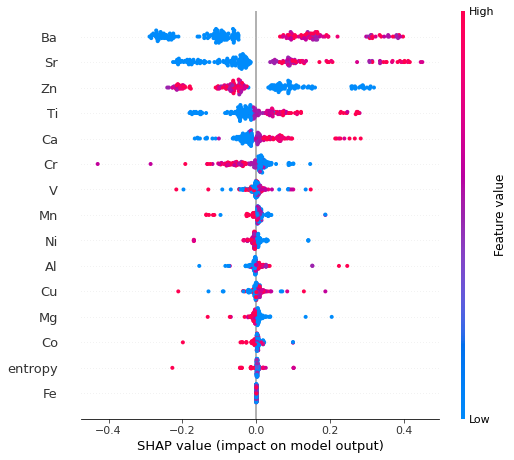

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X, y)
print('5-fold cross validation accuracy(%): ', get_correctness(clf, X, y))
print('training set accuracy(%):', (clf.predict(X) == y).sum() / len(X) * 100)
explainer, shap_values = shap_ana(clf, X, y)

In [6]:
id = 3
shap.force_plot(explainer.expected_value[0], shap_values[0][id,:], X.iloc[id,:])

In [7]:
'''
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20, 20))
tree.plot_tree(clf, feature_names=list(atom_dict.values()), class_names=['non-crystall', 'crystall'], filled=True)
plt.savefig('tree.png')
'''

"\nimport matplotlib.pyplot as plt\nfrom sklearn import tree\nfig = plt.figure(figsize=(20, 20))\ntree.plot_tree(clf, feature_names=list(atom_dict.values()), class_names=['non-crystall', 'crystall'], filled=True)\nplt.savefig('tree.png')\n"

# Random Forest

5-fold cross validation accuracy(%):  0.8370388349514564
training set accuracy(%): 100.0


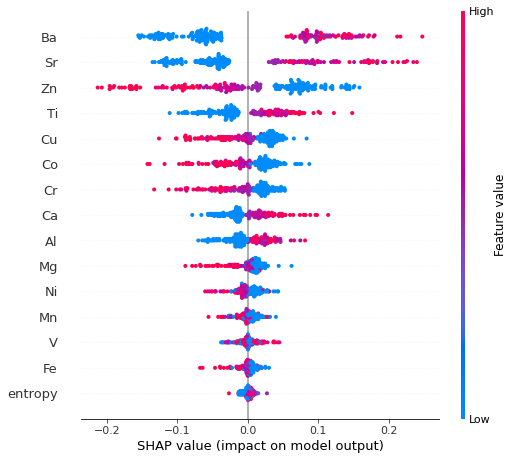

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100).fit(X, y)
print('5-fold cross validation accuracy(%): ', get_correctness(clf, X, y))
print('training set accuracy(%):', (clf.predict(X) == y).sum() / len(X) * 100)
explainer, shap_values = shap_ana(clf, X, y)

In [9]:
id = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][id,:], X.iloc[id,:])